In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [20]:
# Parameters
S0 = 100 # Starting price of the underlying
sigma = 0.25 # Volatility of the underlying
n = 252 # Monitoring dates
T = 1 # Option expiry
r = 0.04 # Risk-free interest rate
M = 100 # Number of simulations
dt = T / n # Time increment of monitoring dates
drift = (r - sigma ** 2 / 2) * dt
# drift = 0

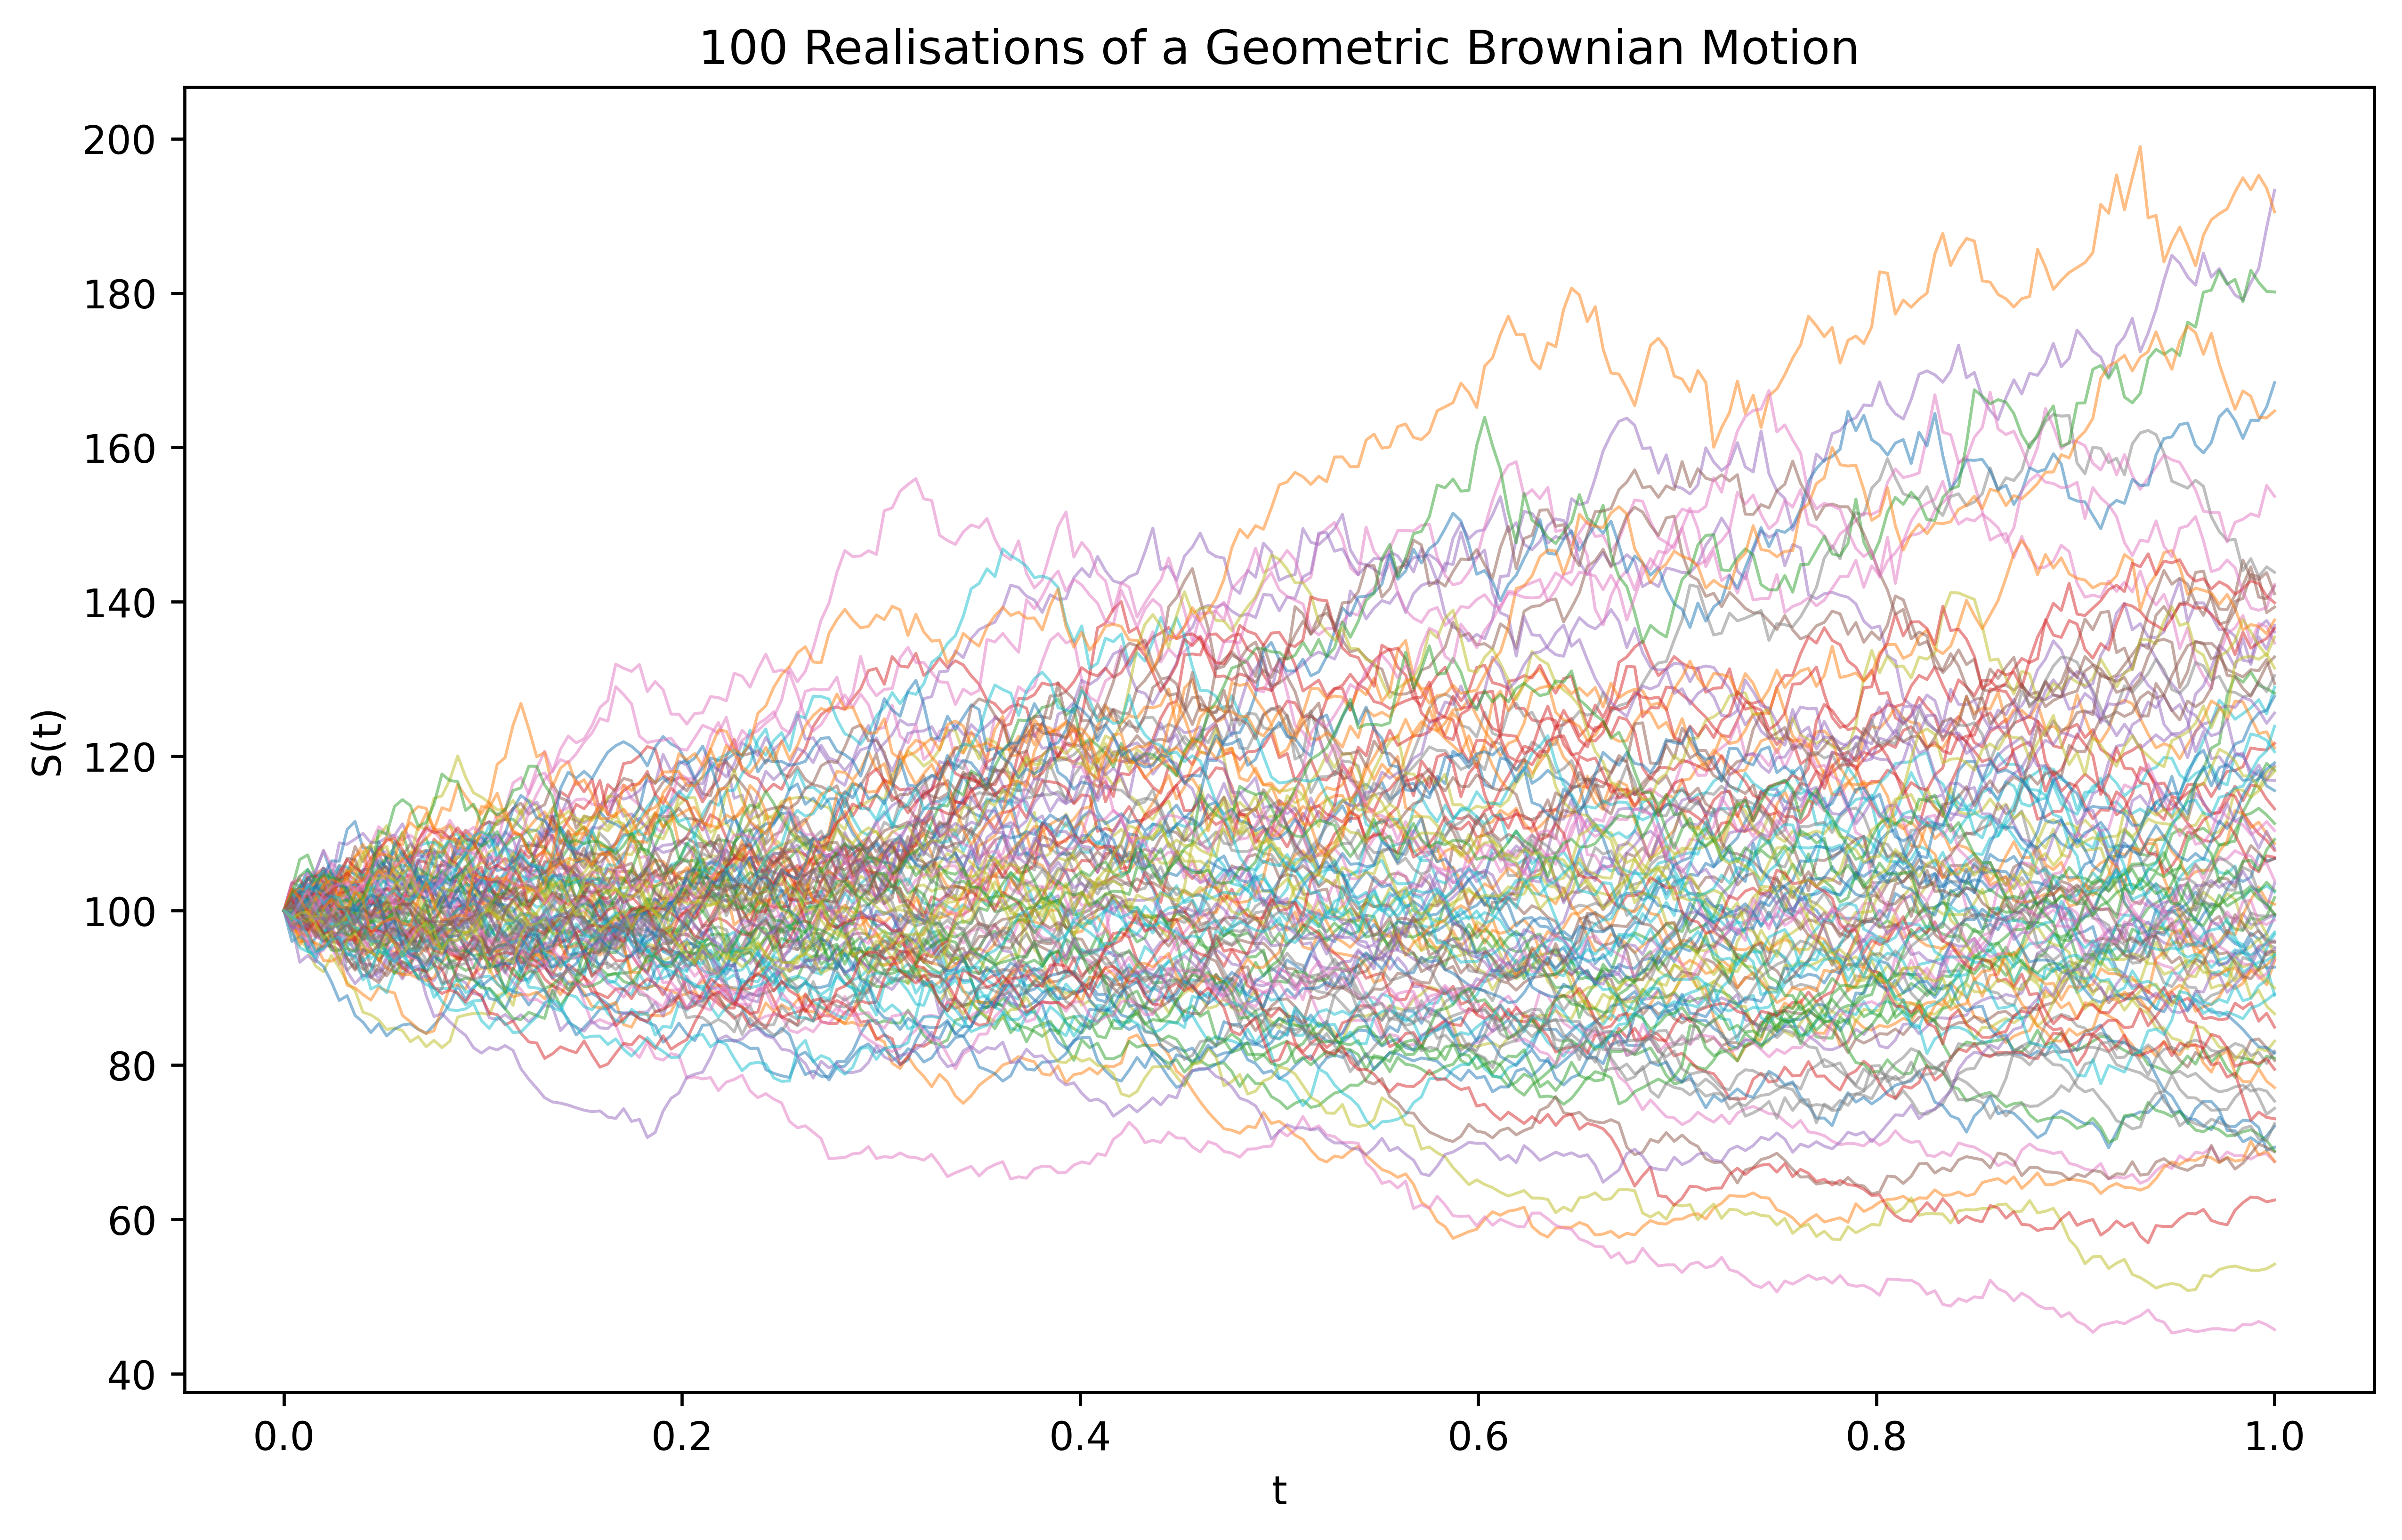

In [21]:
start_time = time.time()
# Generate all random numbers in one go
random_component = np.random.randn(M, n) * np.sqrt(dt)
# Calculate the exponent part of the GBM formula for all paths at once
exponent = (drift + sigma * random_component).cumsum(axis=1)
# Initialize paths array and set the first value to S0 for all paths
pathes = np.zeros((M, n + 1))
pathes[:, 0] = S0
# Calculate the GBM paths
pathes[:, 1:] = S0 * np.exp(exponent)

# Convert paths to a DataFrame for easy handling/display
pathes_df = pd.DataFrame(pathes)

# Parameters for plotting
dpi_value = 600
line_width = 0.75
alpha_value = 0.5
figure_size = (10, 6)

# Generate time points
time_points = np.linspace(0, T, n + 1)

# Plot
plt.figure(figsize=figure_size, dpi=dpi_value)
for j in range(M):
    plt.plot(time_points, pathes_df.iloc[j, :], lw=line_width, alpha=alpha_value)

plt.title(f'{M} Realisations of a Geometric Brownian Motion')
plt.xlabel('t')
plt.ylabel('S(t)')
plt.show()

end_time = time.time()

In [22]:
execution_time = end_time - start_time
print(f"Total Time Elapsed: {execution_time:.1f} seconds")

Total Time Elapsed: 0.9 seconds
